In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
lr = LinearRegression ()
from sklearn.metrics import r2_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.datasets import load_iris


import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
import six
import joblib
import sys
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('redwinecsv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.head().T

0        1       2       3        4
fixed acidity          7.4000   7.8000   7.800  11.200   7.4000
volatile acidity       0.7000   0.8800   0.760   0.280   0.7000
citric acid            0.0000   0.0000   0.040   0.560   0.0000
residual sugar         1.9000   2.6000   2.300   1.900   1.9000
chlorides              0.0760   0.0980   0.092   0.075   0.0760
free sulfur dioxide   11.0000  25.0000  15.000  17.000  11.0000
total sulfur dioxide  34.0000  67.0000  54.000  60.000  34.0000
density                0.9978   0.9968   0.997   0.998   0.9978
pH                     3.5100   3.2000   3.260   3.160   3.5100
sulphates              0.5600   0.6800   0.650   0.580   0.5600
alcohol                9.4000   9.8000   9.800   9.800   9.4000
quality                5.0000   5.0000   5.000   6.000   5.0000

In [7]:
df.tail().T

1594      1595      1596      1597      1598
fixed acidity          6.2000   5.90000   6.30000   5.90000   6.00000
volatile acidity       0.6000   0.55000   0.51000   0.64500   0.31000
citric acid            0.0800   0.10000   0.13000   0.12000   0.47000
residual sugar         2.0000   2.20000   2.30000   2.00000   3.60000
chlorides              0.0900   0.06200   0.07600   0.07500   0.06700
free sulfur dioxide   32.0000  39.00000  29.00000  32.00000  18.00000
total sulfur dioxide  44.0000  51.00000  40.00000  44.00000  42.00000
density                0.9949   0.99512   0.99574   0.99547   0.99549
pH                     3.4500   3.52000   3.42000   3.57000   3.39000
sulphates              0.5800   0.76000   0.75000   0.71000   0.66000
alcohol               10.5000  11.20000  11.00000  10.20000  11.00000
quality                5.0000   6.00000   6.00000   5.00000   6.00000

In [30]:
wine = pd.read_csv('redwinecsv')
wine.head().T

0        1       2       3        4
fixed acidity          7.4000   7.8000   7.800  11.200   7.4000
volatile acidity       0.7000   0.8800   0.760   0.280   0.7000
citric acid            0.0000   0.0000   0.040   0.560   0.0000
residual sugar         1.9000   2.6000   2.300   1.900   1.9000
chlorides              0.0760   0.0980   0.092   0.075   0.0760
free sulfur dioxide   11.0000  25.0000  15.000  17.000  11.0000
total sulfur dioxide  34.0000  67.0000  54.000  60.000  34.0000
density                0.9978   0.9968   0.997   0.998   0.9978
pH                     3.5100   3.2000   3.260   3.160   3.5100
sulphates              0.5600   0.6800   0.650   0.580   0.5600
alcohol                9.4000   9.8000   9.800   9.800   9.4000
quality                5.0000   5.0000   5.000   6.000   5.0000

In [31]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
df.loc[df.quality >= 7, 'quality'] = 1

In [10]:
df.quality.unique()

array([5, 6, 1, 4, 3], dtype=int64)

In [11]:
df.quality.value_counts()

5    681
6    638
1    217
4     53
3     10
Name: quality, dtype: int64

In [12]:
df.shape

(1599, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
df.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   4.810507   1.610662  1.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                5.00000   6.000000    6.00000

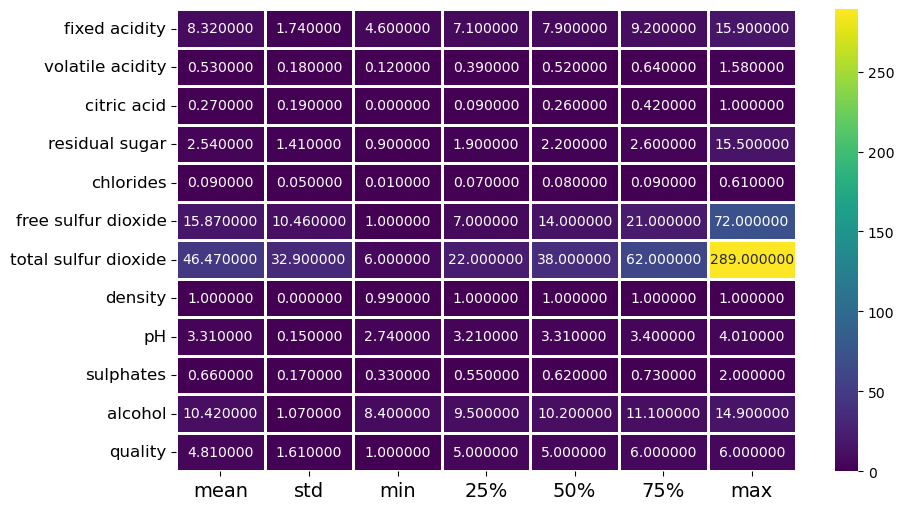

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(round(df.describe()[1:].transpose(), 2), linewidth=2, annot=True, fmt='f', cmap='viridis')
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

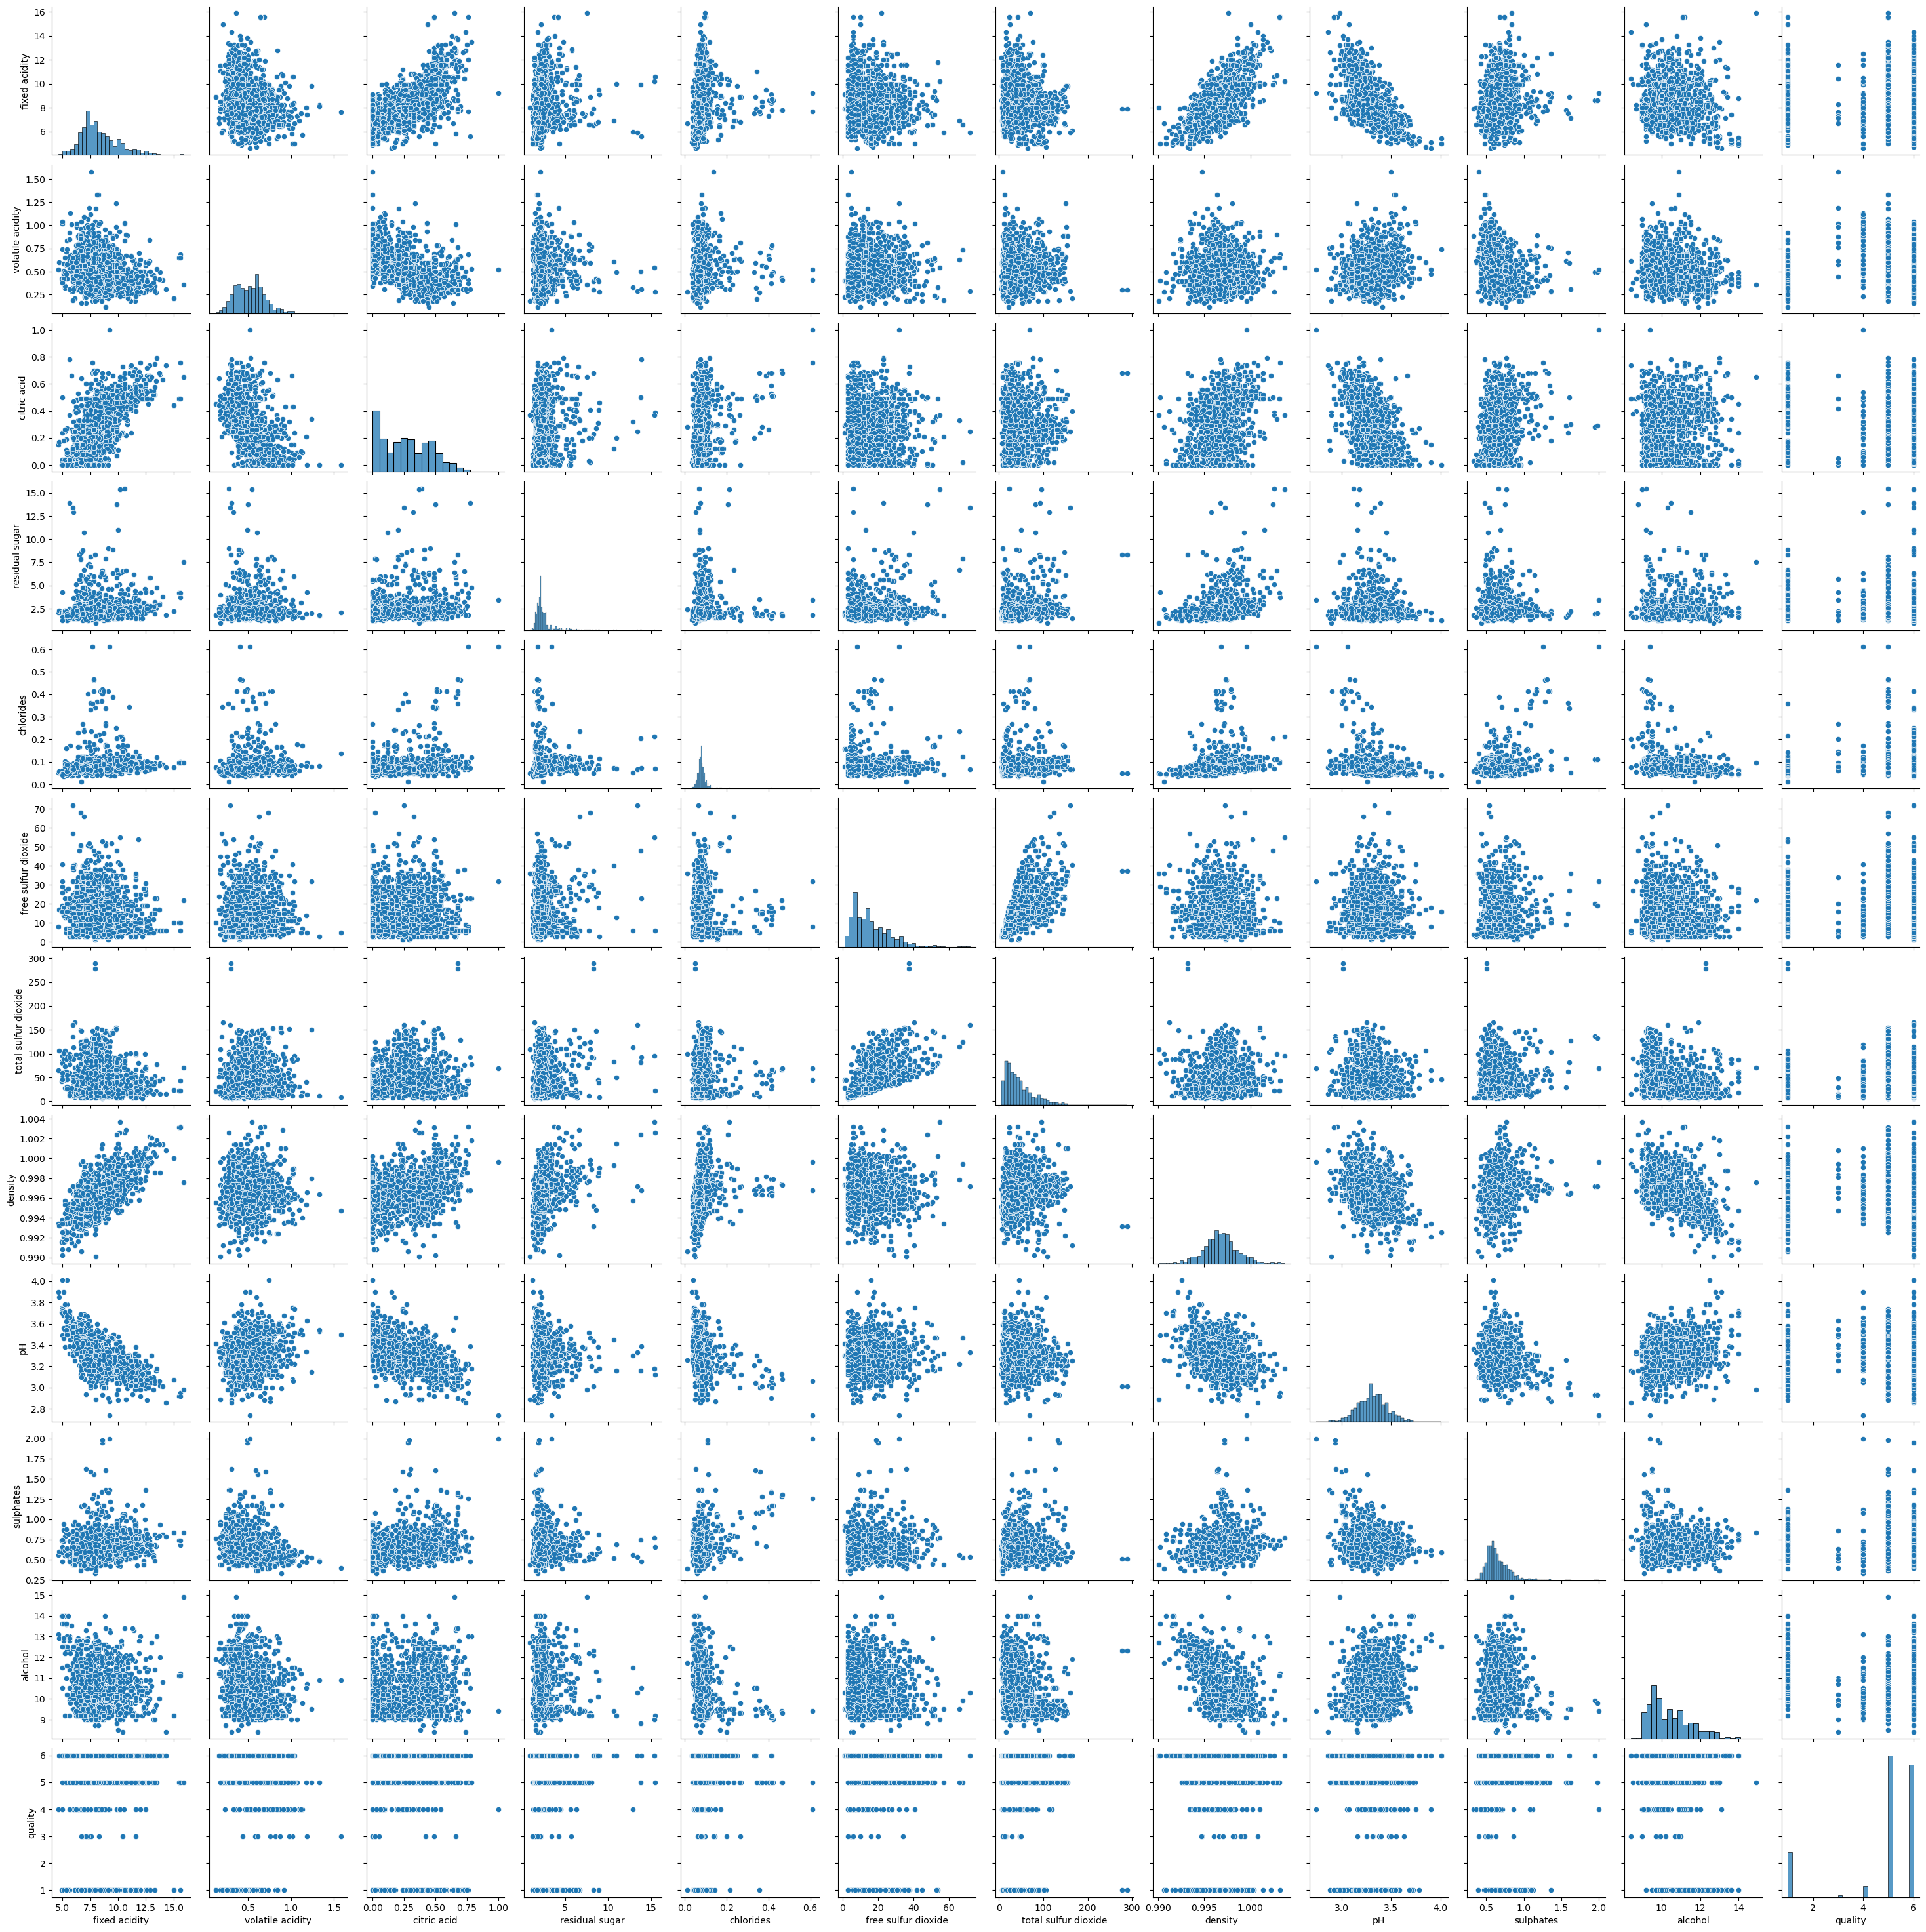

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot (df)
plt.savefig('pairplot.png')
plt.show()

<Axes: xlabel='quality', ylabel='count'>

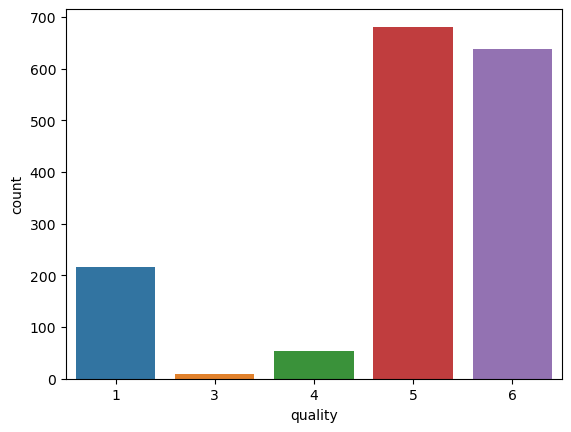

In [18]:
sns.countplot(x='quality', data = df)

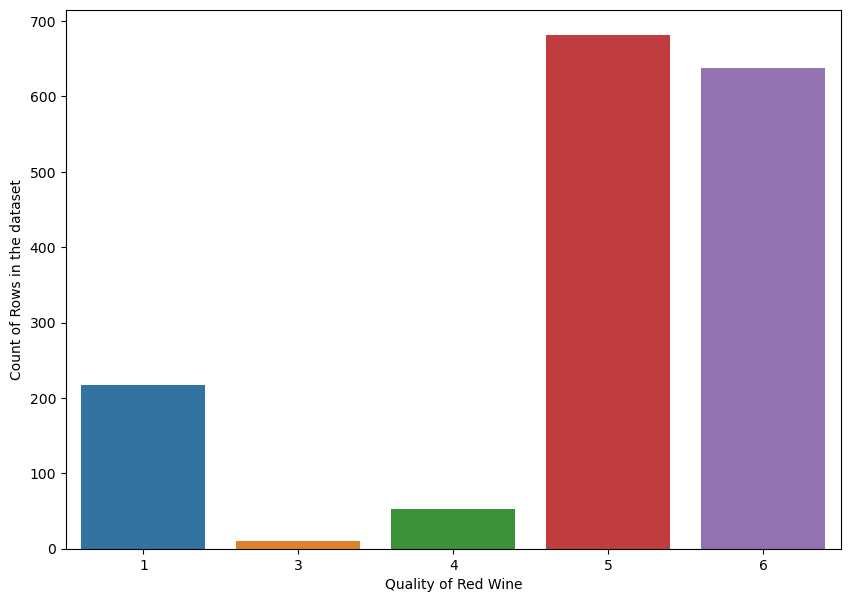

In [19]:
plt.figure(figsize=(10,7))
sns.countplot(x ='quality', data = df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

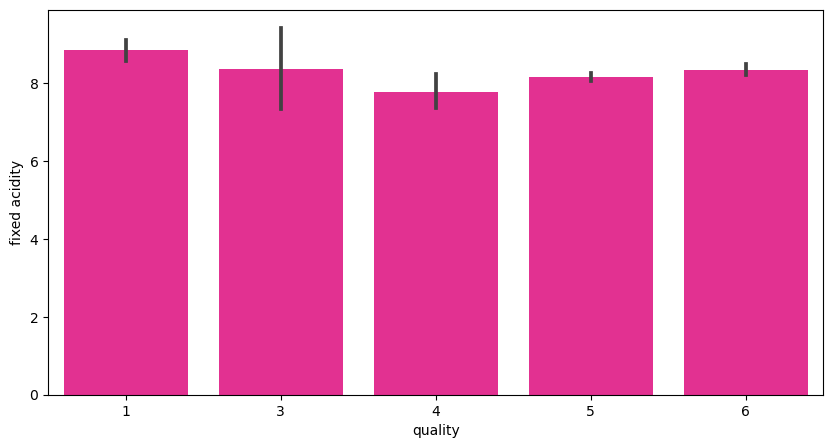

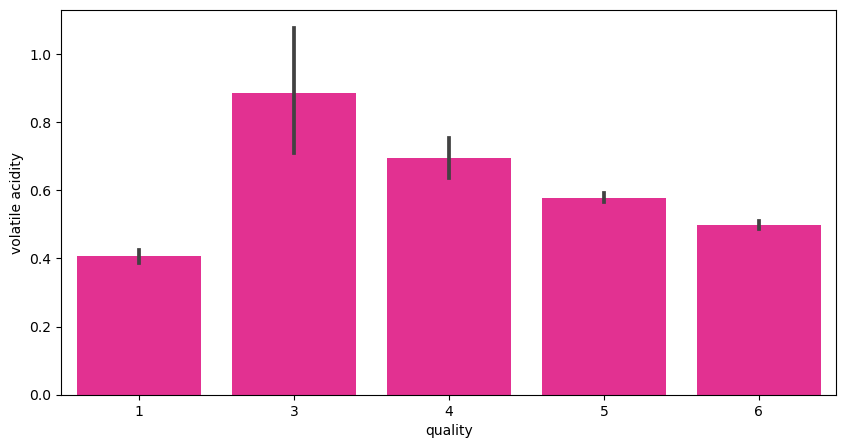

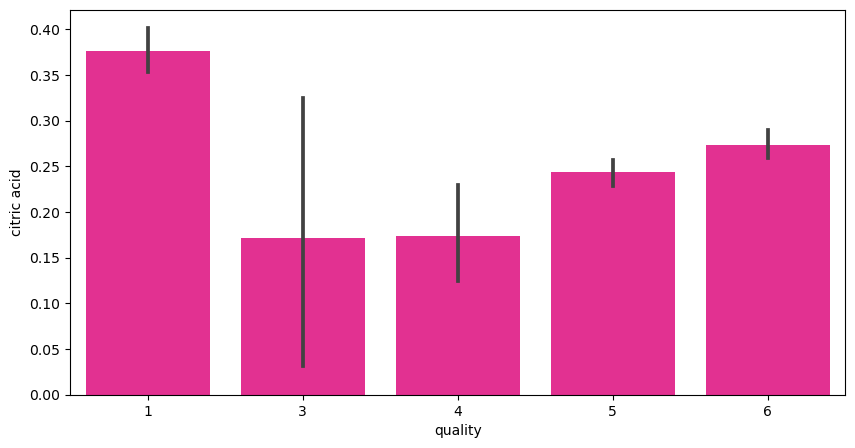

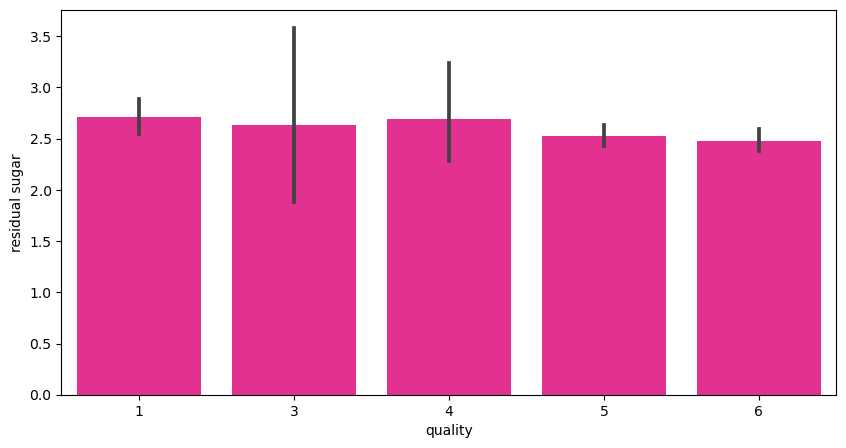

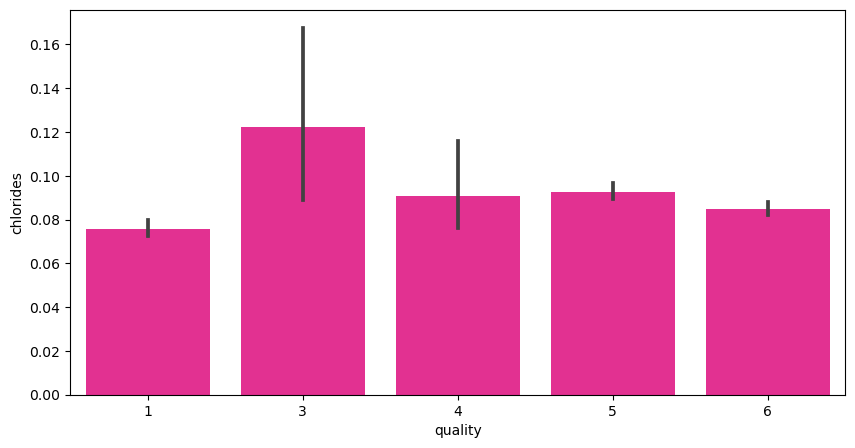

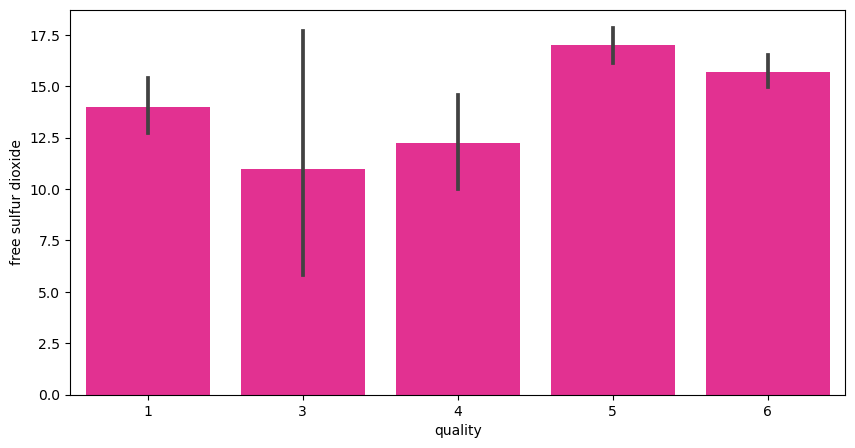

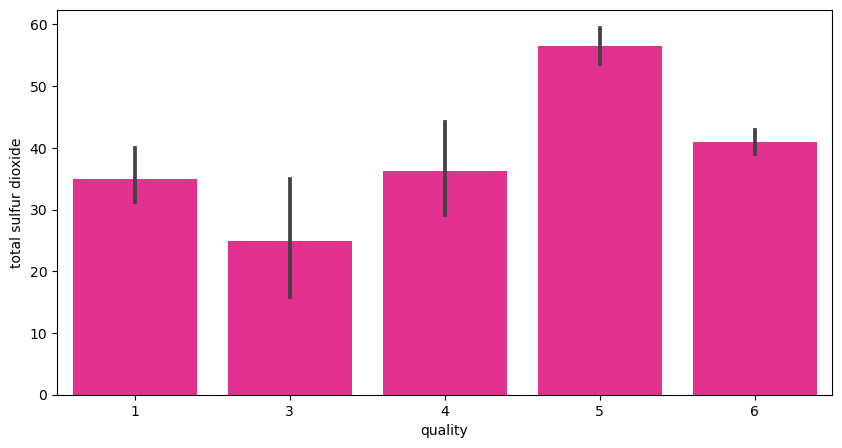

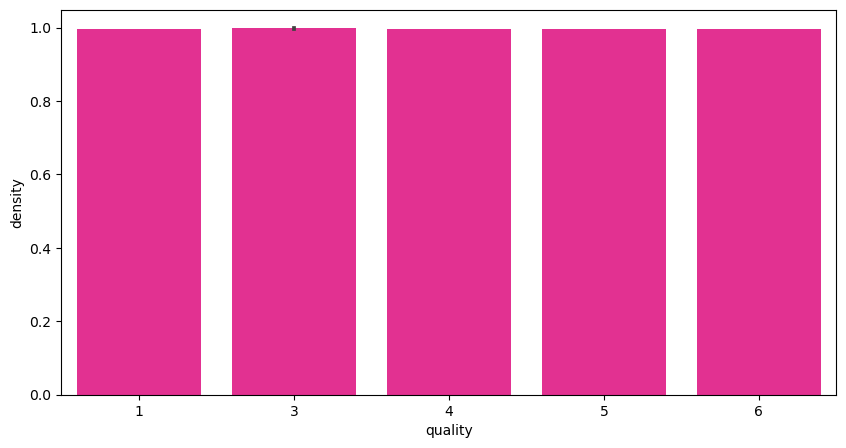

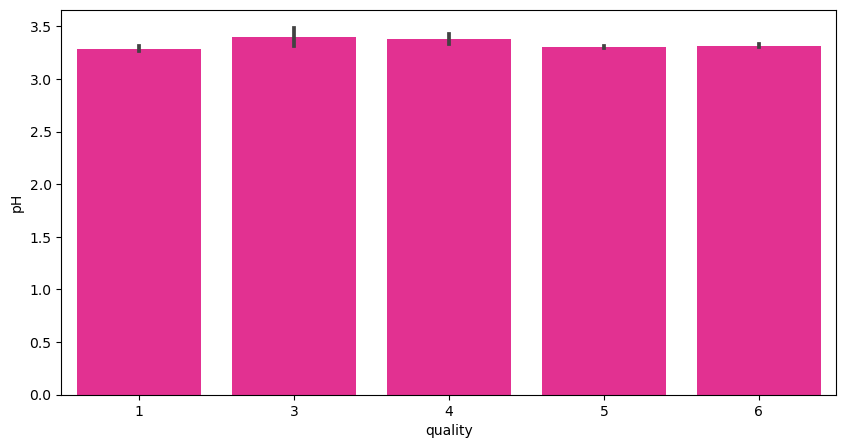

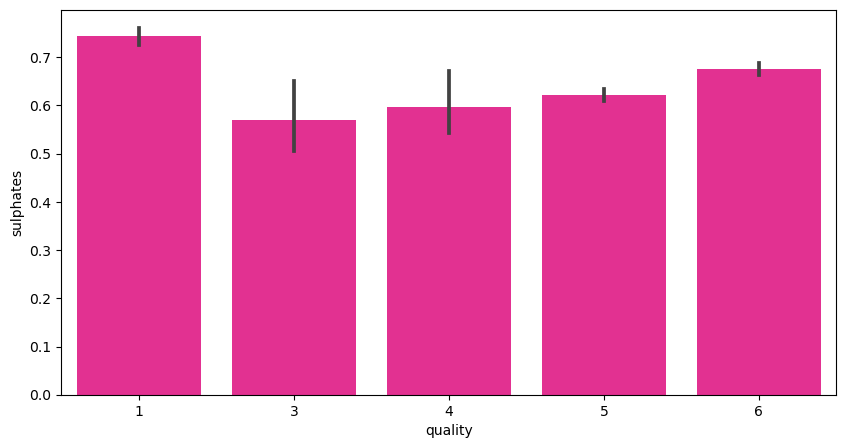

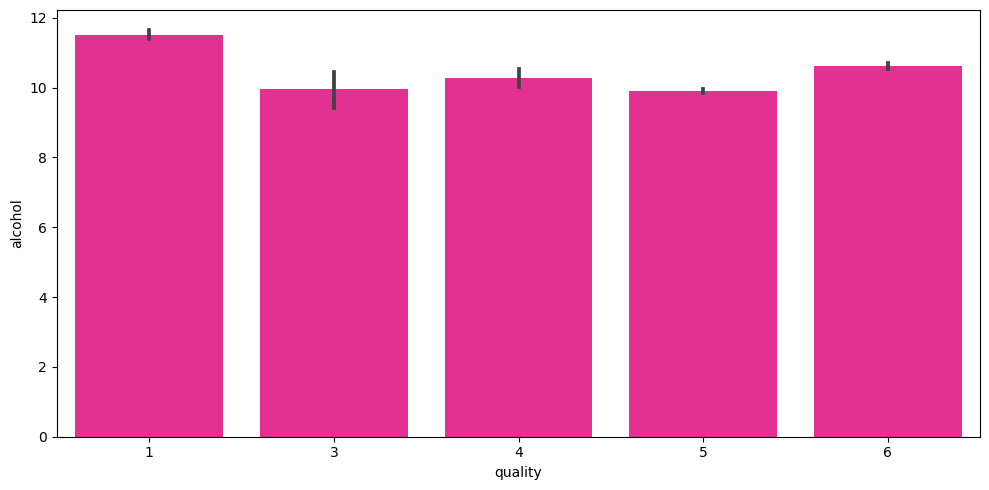

In [20]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=df, color="deeppink")
plt.tight_layout()
plt.show()

<Axes: >

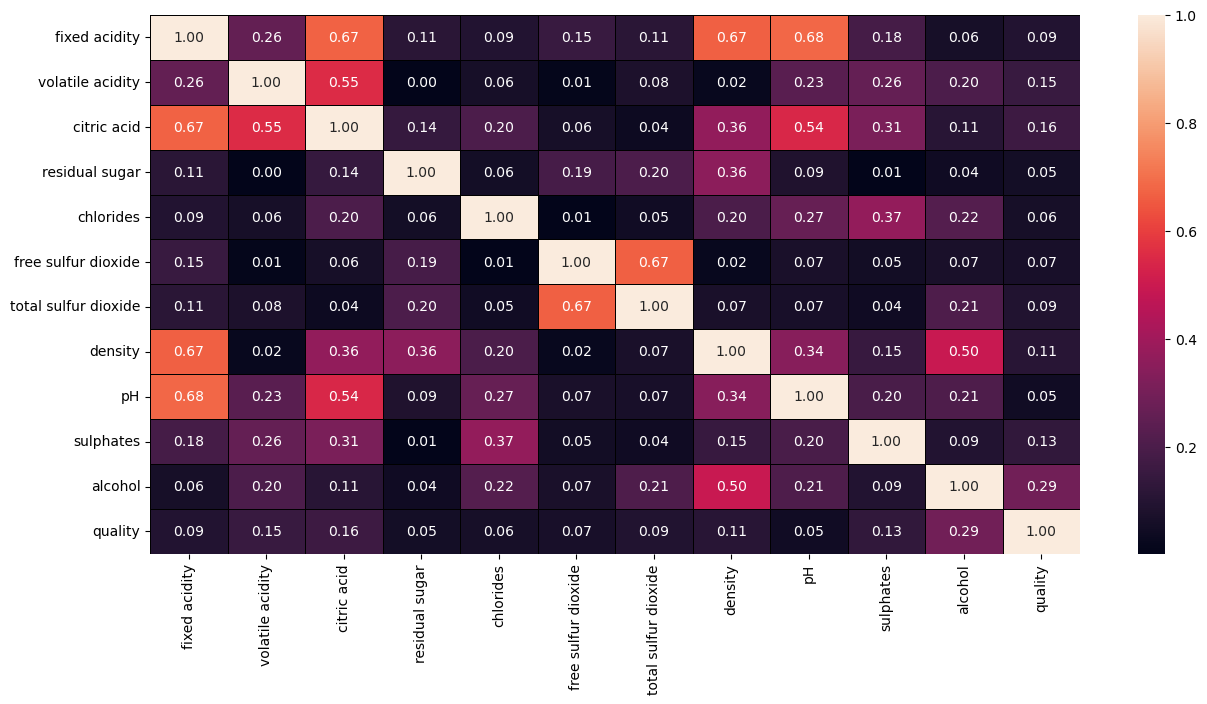

In [21]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr().abs(), annot = True, linewidths=0.5, linecolor  = "black", fmt='.2f')

In [22]:
df_corr = df.corr().abs()['quality'].sort_values() #checking the correlations with label in ascending order
df_corr

pH                      0.046147
residual sugar          0.054284
chlorides               0.062378
free sulfur dioxide     0.067902
total sulfur dioxide    0.088012
fixed acidity           0.092016
density                 0.110000
sulphates               0.133058
volatile acidity        0.153741
citric acid             0.164832
alcohol                 0.292038
quality                 1.000000
Name: quality, dtype: float64

<bound method Axes.bar of <Axes: >>

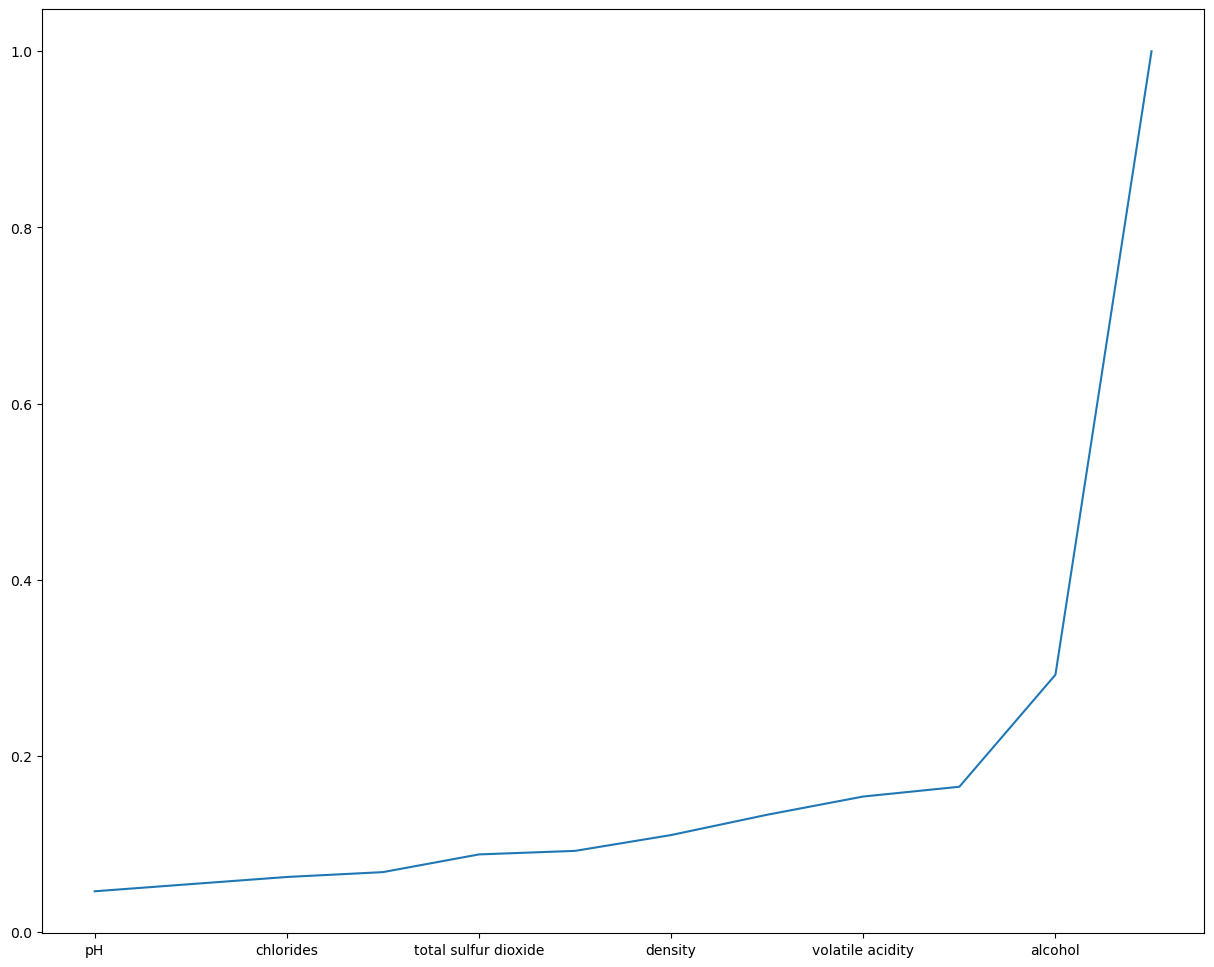

In [23]:
plt.figure (figsize = (15,12))
df_corr.plot().bar

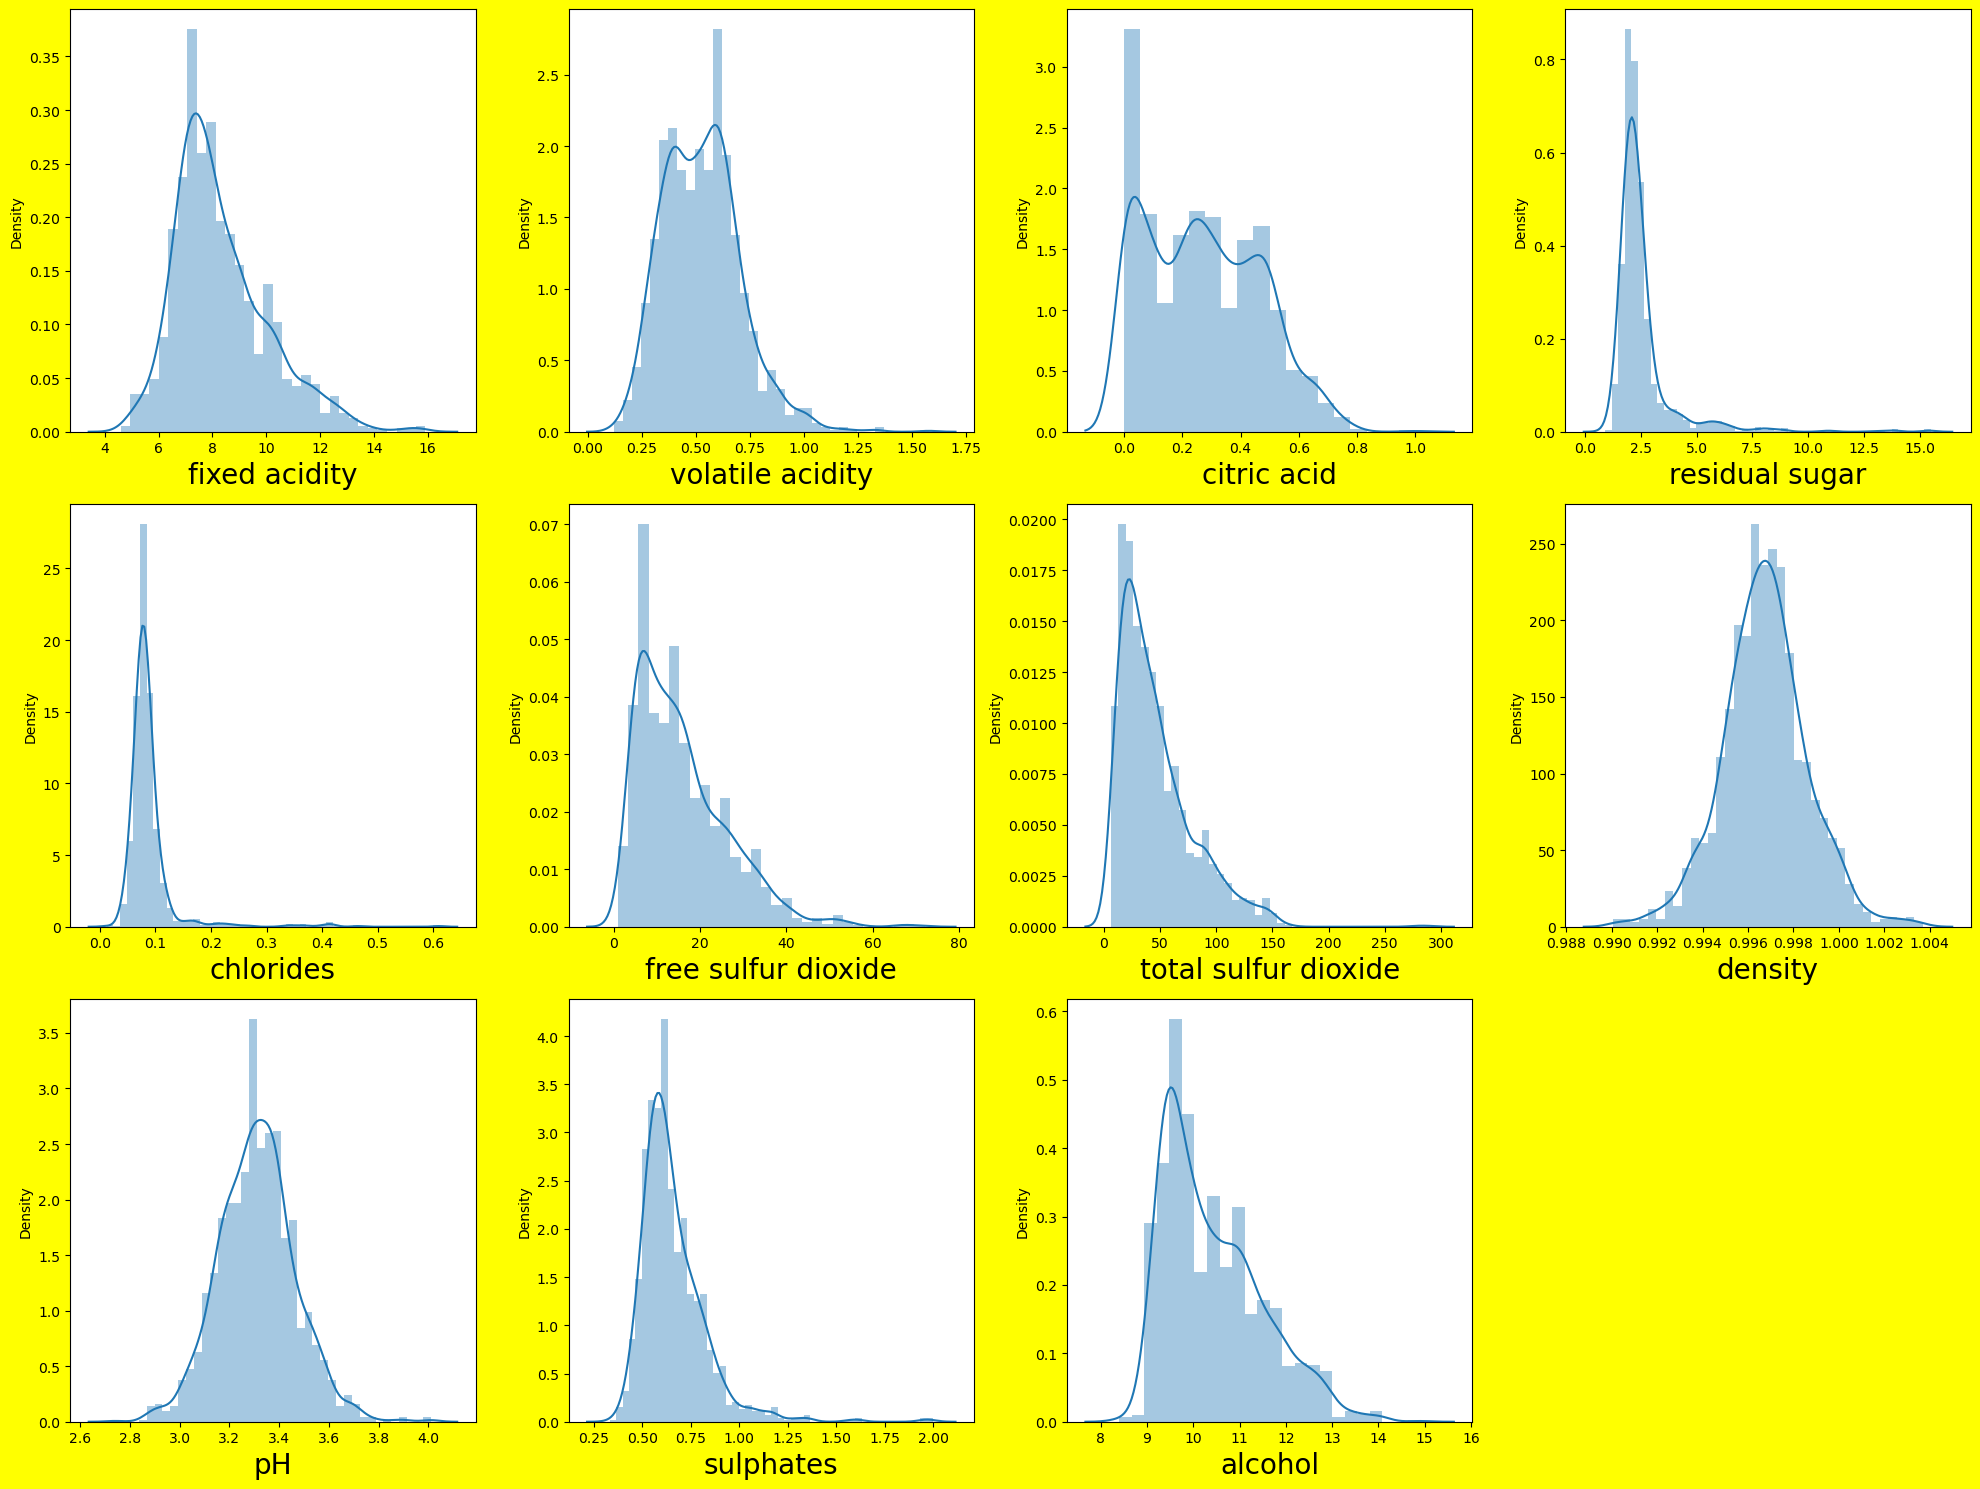

In [24]:
plt.figure(figsize = (20,15), facecolor = 'yellow')
plotnumber = 1 #this is an initiator

for column in df:
    if plotnumber <12: #here 8 is the number of features
        ax = plt.subplot (3,4, plotnumber)
        sns.distplot (df [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

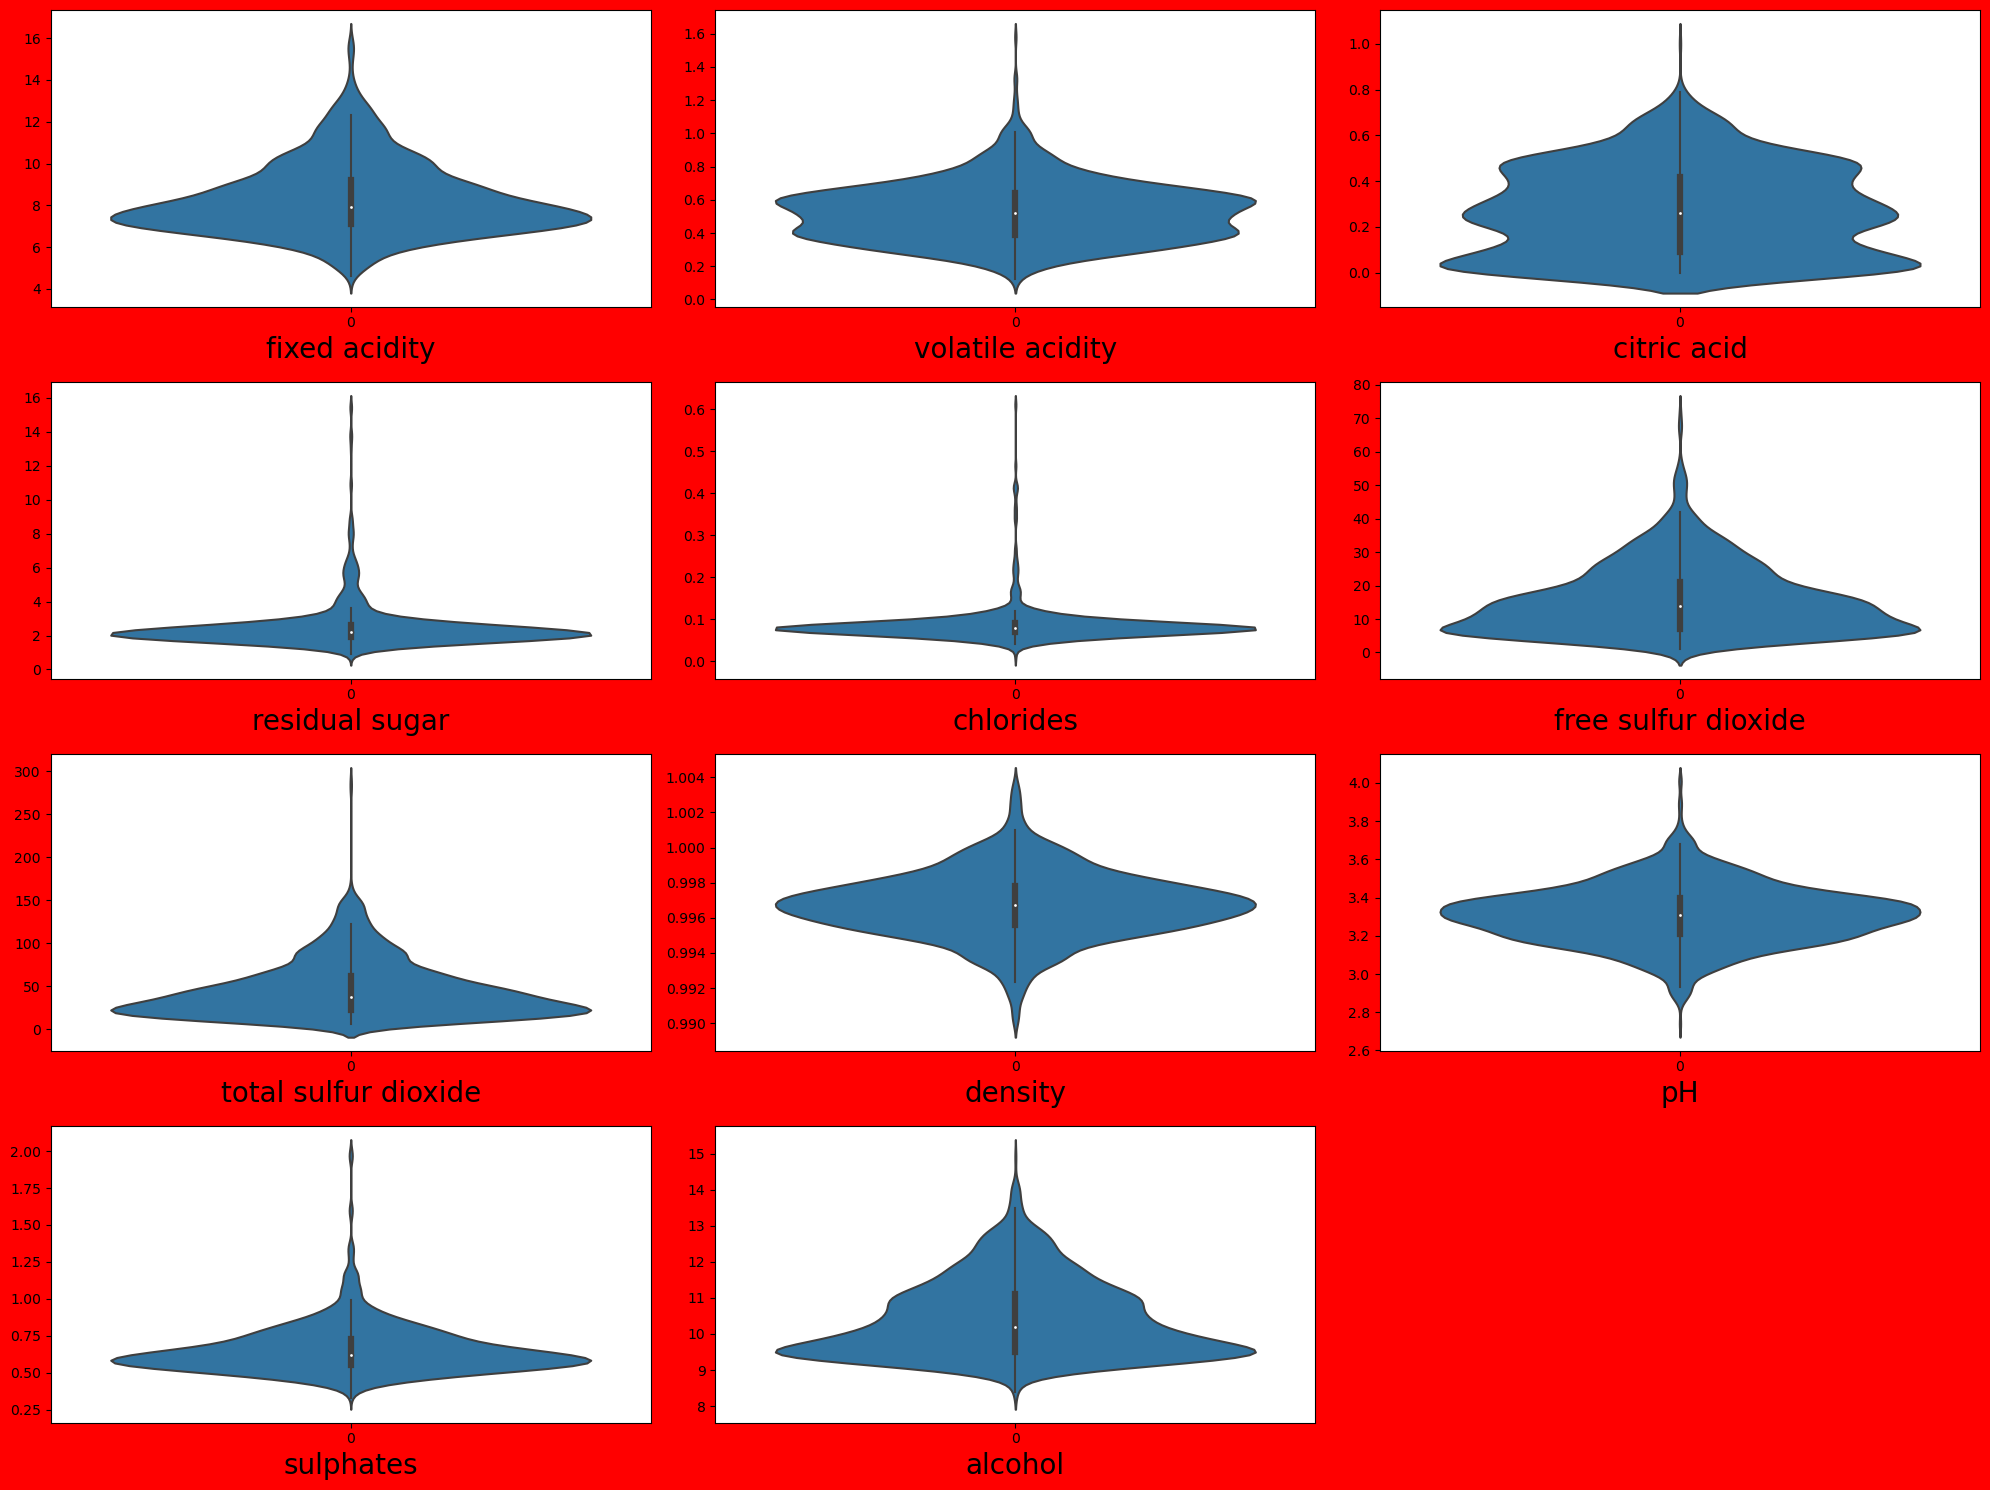

In [25]:
plt.figure(figsize = (20,15), facecolor = 'red')
plotnumber = 1 #this is an initiator

for column in df:
	if plotnumber <12: #here 12 is the number of features
		ax = plt.subplot (4,3, plotnumber)
		sns.violinplot (df[column], hue_order = "yellow")
		plt.xlabel (column, fontsize =20)
	plotnumber +=1
plt.tight_layout()

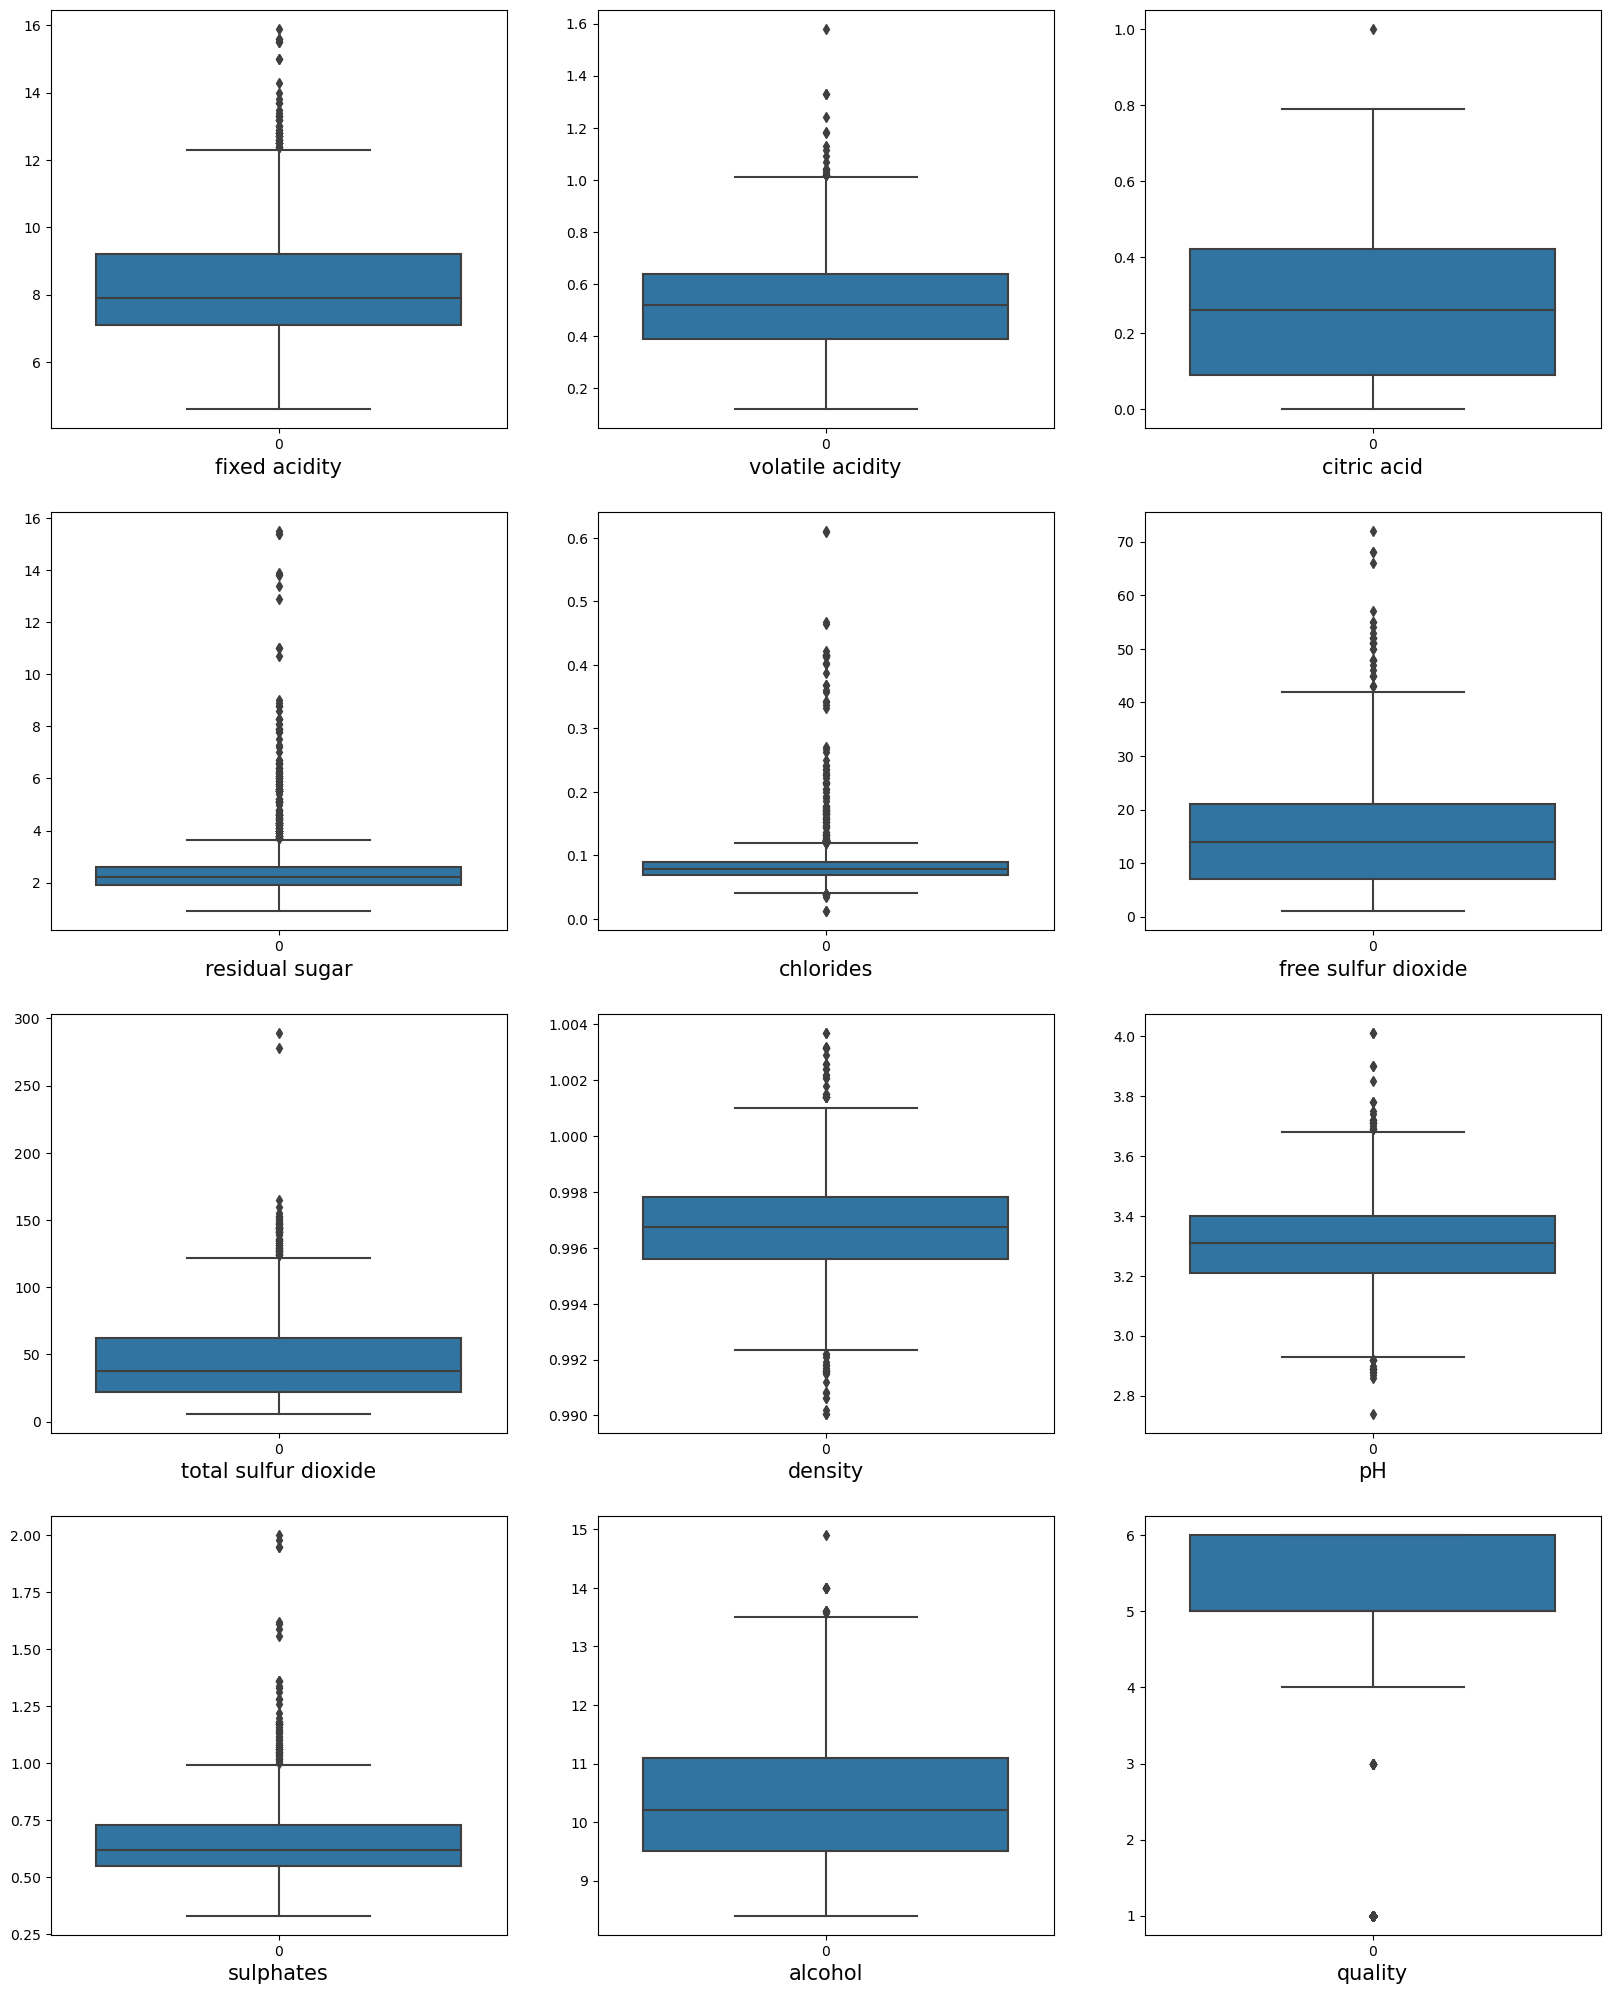

In [26]:
plt.figure (figsize = (20,25))
graph = 1 #Initiator

for column in df:
    if graph <=12: 
        plt.subplot (4,3, graph)
        ax = sns.boxplot (data = df[column],)
        plt.xlabel (column, fontsize = 15)
    graph +=1
plt.show()

In [32]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

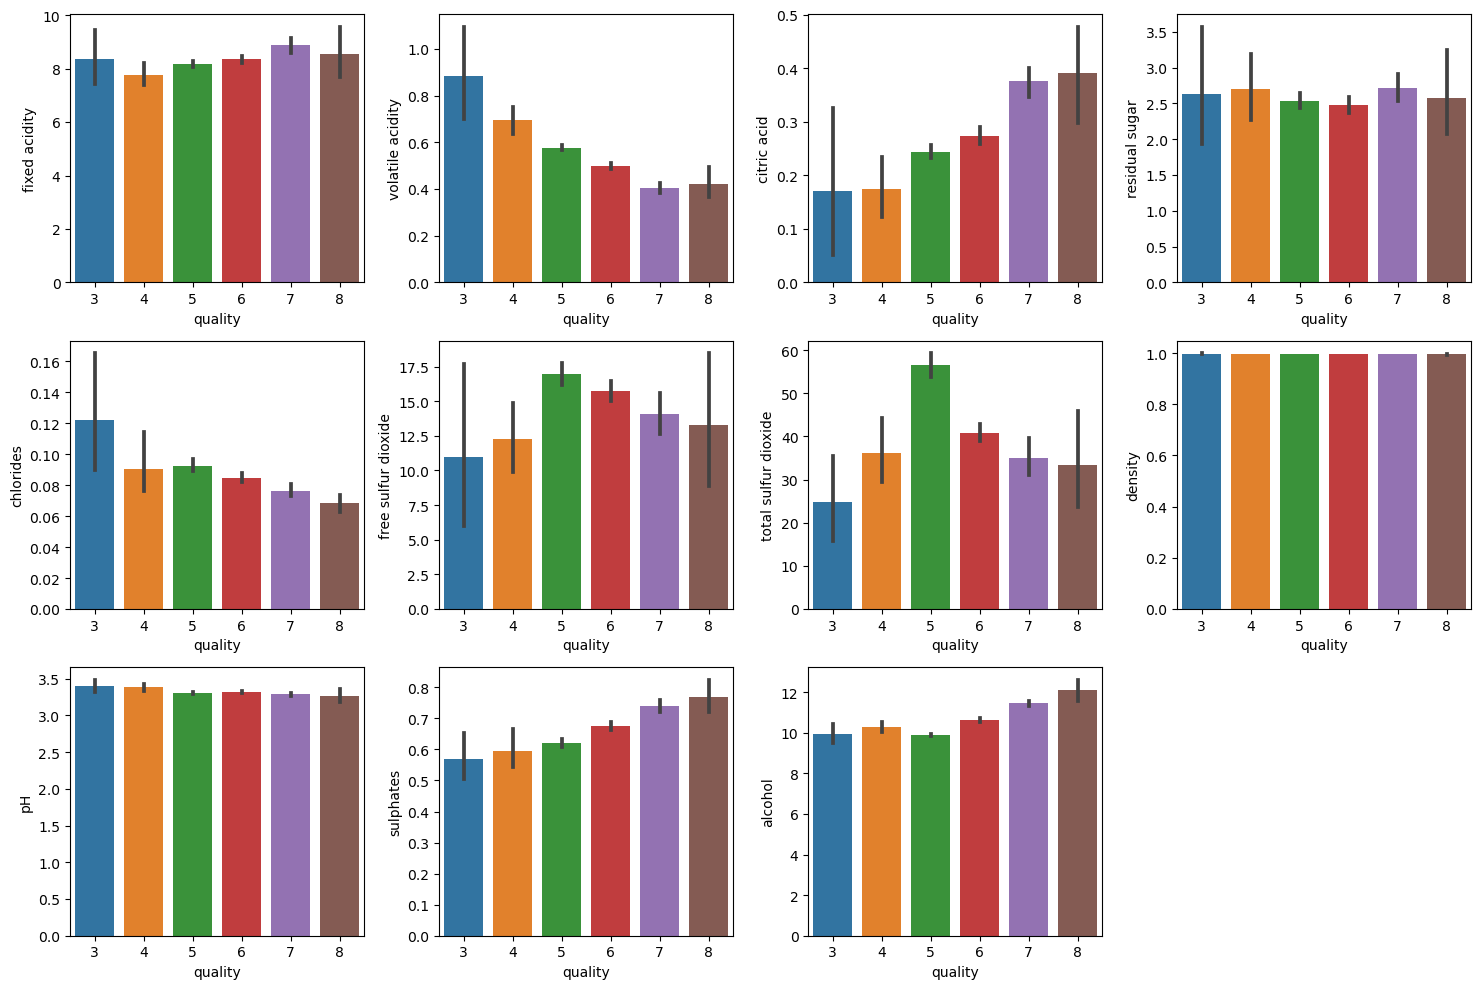

In [33]:
fig = plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=wine)

plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=wine)

plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=wine)

plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=wine)

plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=wine)

plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=wine)

plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=wine)

plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=wine)

plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=wine)

plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=wine)

plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=wine)

plt.tight_layout()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [35]:
df.skew().sort_values()

quality                -1.651791
density                 0.071288
pH                      0.193683
citric acid             0.318337
volatile acidity        0.671593
alcohol                 0.860829
fixed acidity           0.982751
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
sulphates               2.428672
residual sugar          4.540655
chlorides               5.680347
dtype: float64

In [36]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [38]:
x=df.drop('quality', axis=1)
y= df.quality

In [39]:
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [40]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [41]:
y.sample(5)

858     1
1531    5
924     5
1408    1
214     6
Name: quality, dtype: int64

In [42]:
qt = QuantileTransformer()
np_array = qt.fit_transform(x) 
np_array

array([[0.34534535, 0.85735736, 0.        , ..., 0.8998999 , 0.28128128,
        0.15365365],
       [0.46746747, 0.96346346, 0.        , ..., 0.23023023, 0.66266266,
        0.36986987],
       [0.46746747, 0.90840841, 0.16216216, ..., 0.36036036, 0.59059059,
        0.36986987],
       ...,
       [0.07107107, 0.48198198, 0.30580581, ..., 0.78928929, 0.78128128,
        0.72622623],
       [0.03303303, 0.76876877, 0.29179179, ..., 0.95145145, 0.71671672,
        0.51201201],
       [0.04004004, 0.0995996 , 0.80630631, ..., 0.71971972, 0.61611612,
        0.72622623]])

In [43]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [44]:
xt = pd.DataFrame(np_array, columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

In [45]:
xt.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.345345          0.857357     0.000000        0.253253   0.401401   
1       0.467467          0.963463     0.000000        0.753754   0.843844   
2       0.467467          0.908408     0.162162        0.587087   0.771271   
3       0.922923          0.061562     0.926927        0.253253   0.370871   
4       0.345345          0.857357     0.000000        0.253253   0.401401   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.396897              0.449950  0.739239  0.899900   0.281281   
1             0.813814              0.785786  0.517017  0.230230   0.662663   
2             0.553554              0.690190  0.568569  0.360360   0.590591   
3             0.634635              0.734234  0.777277  0.155656   0.355856   
4             0.396897              0.449950  0.739239  0.899900   0.281281   

    alcohol  
0  0.153654  
1  0.369870  
2  0.369870  
3  0.369870  
4  0.153654

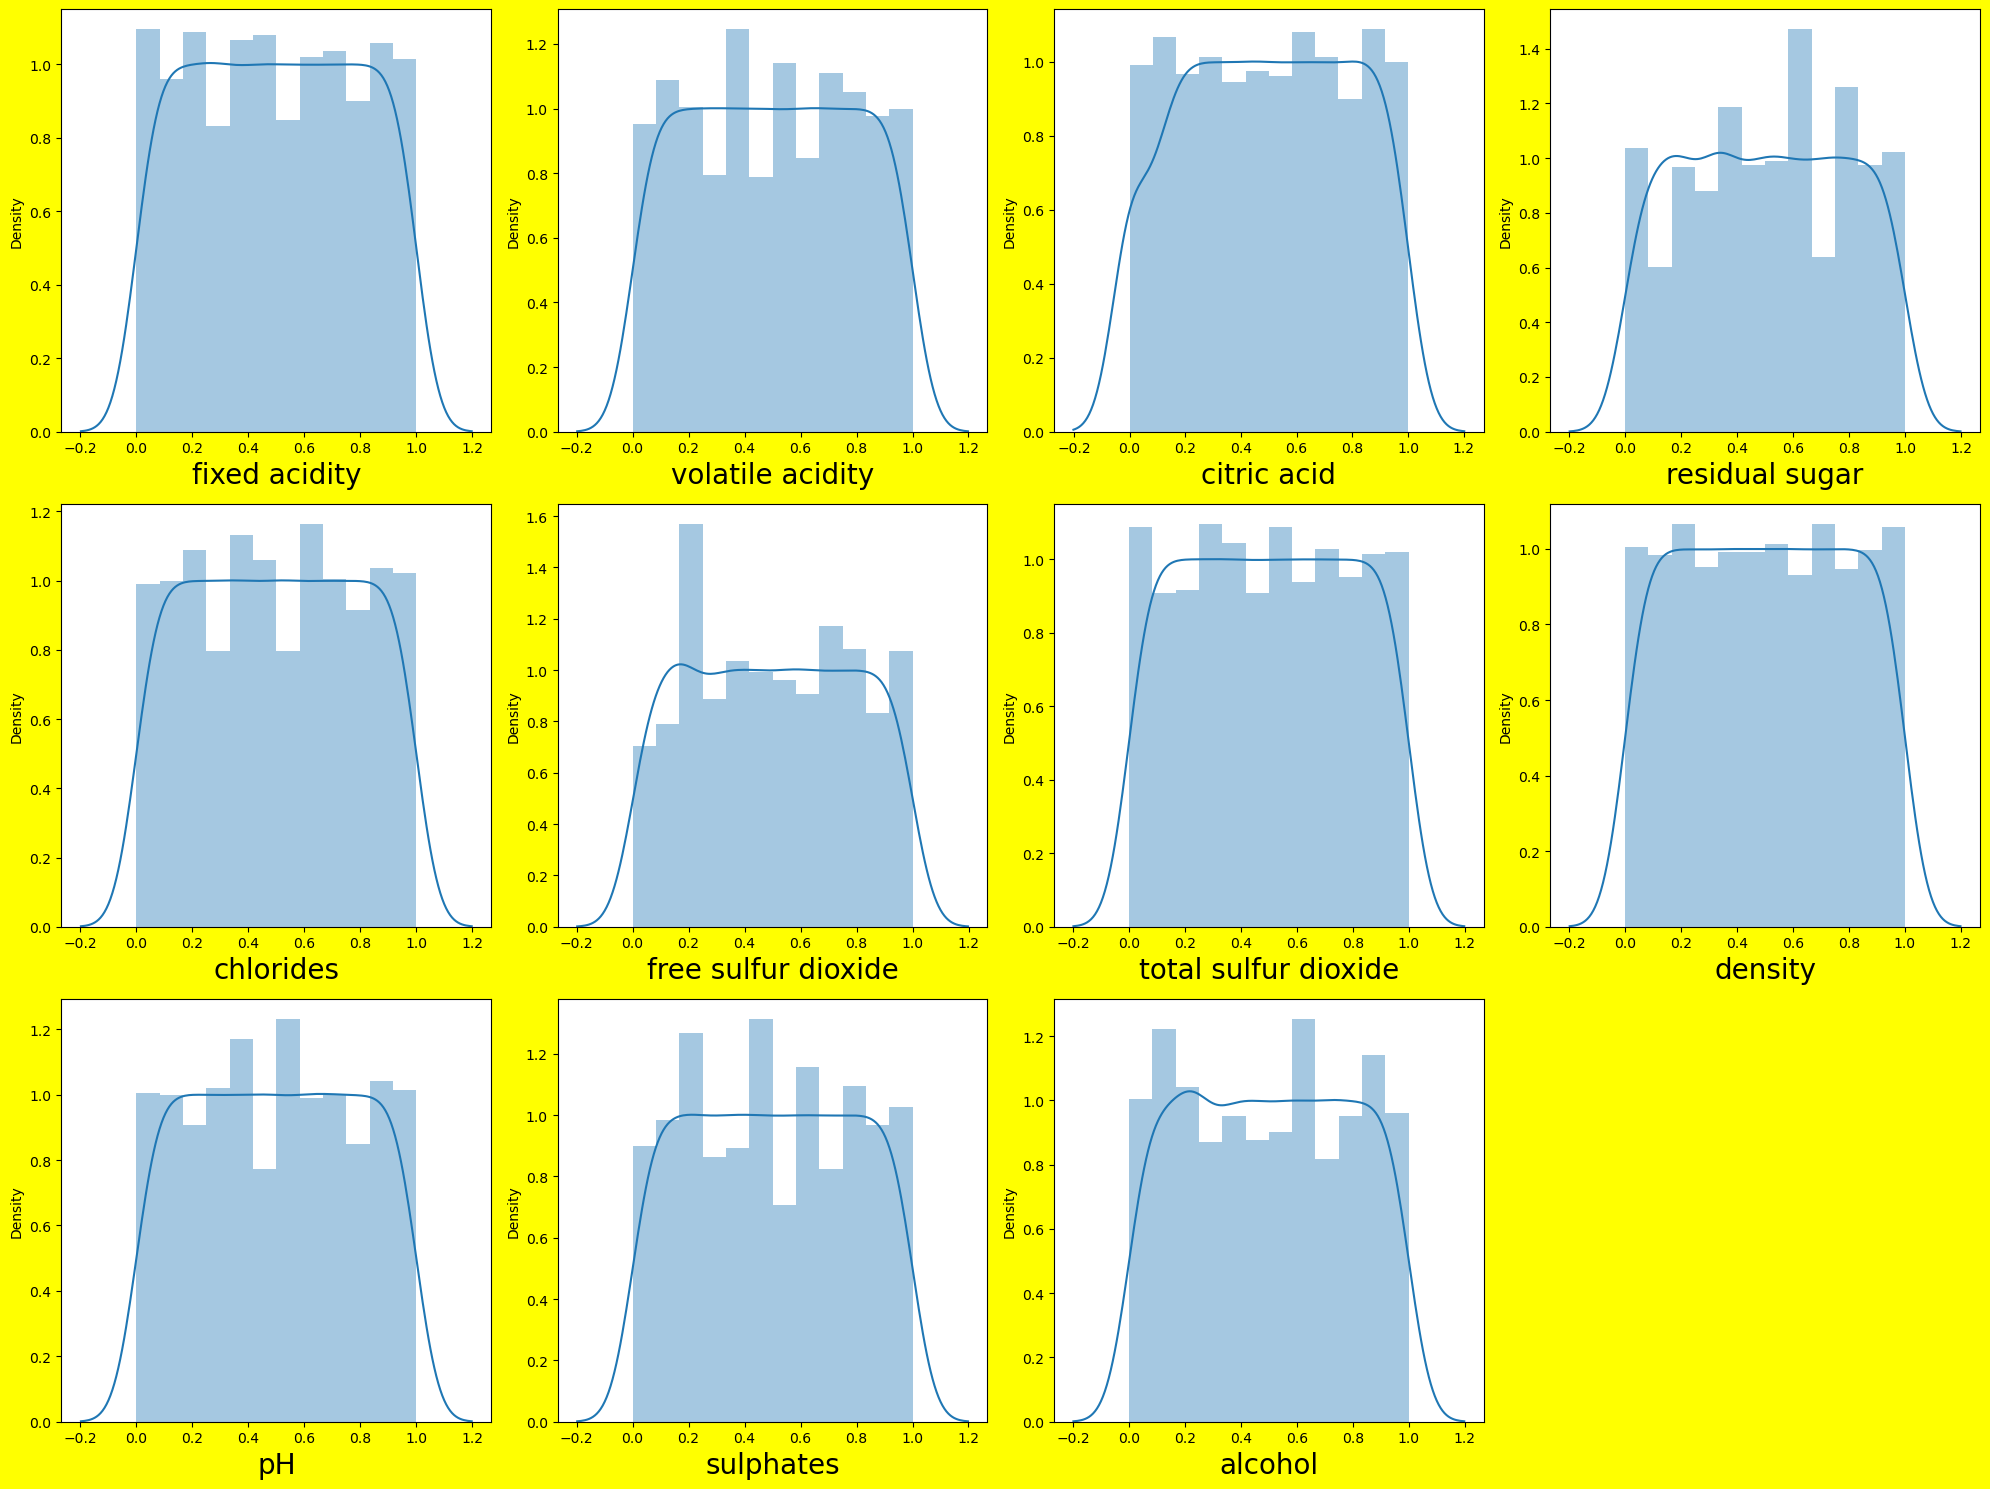

In [46]:
plt.figure(figsize = (20,15), facecolor = 'yellow')
plotnumber = 1 #this is an initiator

for column in xt:
    if plotnumber <12: #here 8 is the number of features
        ax = plt.subplot (3,4, plotnumber)
        sns.distplot (xt [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()


<Axes: ylabel='count'>

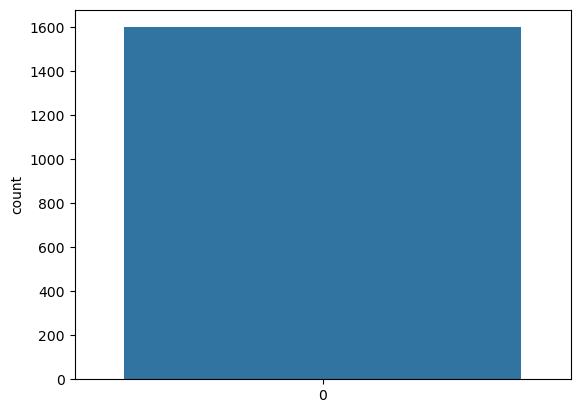

In [47]:
sns.countplot(y)

In [48]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split (xt, y, test_size = 0.2, random_state = i)
    lr.fit (x_train, y_train)
    pred_train = lr.predict (x_train)
    pred_test = lr.predict (x_test)
    print (f"At random state {i}, the training accuracy is: {r2_score (y_train, pred_train)}")
    print (f"At random state {i}, the testing accuracy is: {r2_score (y_test, pred_test)}")
    print ('\n')

At random state 0, the training accuracy is: 0.14563984955122367
At random state 0, the testing accuracy is: -0.04068131352992155


At random state 1, the training accuracy is: 0.1393513378264184
At random state 1, the testing accuracy is: 0.019284920723056098


At random state 2, the training accuracy is: 0.11989501329590135
At random state 2, the testing accuracy is: 0.13638113428558585


At random state 3, the training accuracy is: 0.12544508286844847
At random state 3, the testing accuracy is: 0.1138580087125648


At random state 4, the training accuracy is: 0.11859883681365324
At random state 4, the testing accuracy is: 0.14169777213168966


At random state 5, the training accuracy is: 0.13108704358188594
At random state 5, the testing accuracy is: 0.0814700707441044


At random state 6, the training accuracy is: 0.13091735349207856
At random state 6, the testing accuracy is: 0.08600435272564821


At random state 7, the training accuracy is: 0.12344075725612313
At random state 7, 

In [50]:
sys.modules ['sklearn.externals.six'] = six
sys.modules ['sklearn.externals.joblib'] = joblib

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [53]:
knn.fit(x_train, y_train)
y_pred = knn.predict (x_test)

In [54]:
y_pred

array([5, 6, 6, 6, 5, 5, 5, 6, 5, 1, 6, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 6,
       6, 5, 5, 5, 6, 5, 5, 1, 6, 5, 6, 5, 5, 5, 1, 6, 5, 5, 6, 6, 6, 5,
       1, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 1, 6, 5, 5, 5,
       5, 5, 5, 5, 1, 5, 1, 6, 5, 6, 1, 5, 6, 5, 6, 5, 5, 5, 1, 6, 5, 6,
       5, 5, 5, 6, 5, 5, 6, 1, 6, 1, 1, 5, 5, 5, 5, 6, 5, 1, 5, 6, 1, 6,
       6, 6, 1, 6, 5, 5, 5, 5, 6, 1, 5, 5, 5, 1, 5, 6, 5, 5, 5, 6, 5, 5,
       5, 5, 6, 6, 5, 5, 5, 6, 1, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 4, 5,
       6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 1, 5, 5, 6, 6, 6, 5,
       6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 1, 5, 5, 5, 1, 5, 5, 5, 5, 6, 1, 5,
       5, 1, 6, 5, 5, 1, 5, 5, 5, 1, 5, 5, 5, 1, 5, 5, 6, 5, 5, 6, 6, 6,
       6, 5, 5, 5, 5, 6, 5, 5, 1, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6,
       5, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 1, 5, 6, 5, 1, 5, 5, 1, 5, 5, 5,
       6, 6, 6, 5, 5, 6, 5, 1, 5, 5, 6, 6, 5, 5, 6, 1, 5, 1, 6, 6, 6, 6,
       6, 5, 6, 5, 4, 5, 5, 1, 5, 6, 1, 5, 5, 5, 5,

In [55]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.596875

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict (x_test)

In [57]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.653125

In [58]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict (x_test)

In [59]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.625

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [61]:
from sklearn.model_selection import GridSearchCV, KFold

In [62]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

In [65]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [66]:

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [67]:
ranges = (2,6.5,8) 
groups = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins=ranges,labels=groups)

In [70]:
le = LabelEncoder()
wine['quality'] = le.fit_transform(wine['quality'])
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        0  
4      9.4        0

In [71]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [72]:
good_quality = wine[wine['quality']==1]
bad_quality = wine[wine['quality']==0]

bad_quality = bad_quality.sample(frac=1)
bad_quality = bad_quality[:217]

new_df = pd.concat([good_quality,bad_quality])
new_df = new_df.sample(frac=1)
new_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
982             7.3             0.520         0.32             2.1      0.070   
449            11.9             0.390         0.69             2.8      0.095   
443            10.0             0.440         0.49             2.7      0.077   
364            12.8             0.615         0.66             5.8      0.083   
1440            7.2             0.370         0.32             2.0      0.062   
...             ...               ...          ...             ...        ...   
972            10.1             0.380         0.50             2.4      0.104   
144             5.2             0.340         0.00             1.8      0.050   
1186            6.6             0.800         0.03             7.8      0.079   
547            10.6             0.310         0.49             2.5      0.067   
1058            9.9             0.530         0.57             2.4      0.093   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
982                  51.0                  70.0  0.99418  3.34       0.82   
449                  17.0                  35.0  0.99940  3.10       0.61   
443                  11.0                  19.0  0.99630  3.23       0.63   
364                   7.0                  42.0  1.00220  3.07       0.73   
1440                 15.0                  28.0  0.99470  3.23       0.73   
...                   ...                   ...      ...   ...        ...   
972                   6.0                  13.0  0.99643  3.22       0.65   
144                  27.0                  63.0  0.99160  3.68       0.79   
1186                  6.0                  12.0  0.99630  3.52       0.50   
547                   6.0                  21.0  0.99870  3.26       0.86   
1058                 30.0                  52.0  0.99710  3.19       0.76   

      alcohol  quality  
982      12.9        0  
449      10.8        0  
443      11.6        1  
364      10.0        1  
1440     11.3        1  
...       ...      ...  
972      11.6        1  
144      14.0        0  
1186     12.2        0  
547      10.7        0  
1058     11.6        1  

[434 rows x 12 columns]

In [73]:
new_df['quality'].value_counts()

0    217
1    217
Name: quality, dtype: int64

In [74]:
new_df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.565362
sulphates               0.343786
citric acid             0.338868
fixed acidity           0.171528
residual sugar          0.088737
pH                     -0.076057
free sulfur dioxide    -0.101665
chlorides              -0.156576
total sulfur dioxide   -0.200540
density                -0.203393
volatile acidity       -0.423078
Name: quality, dtype: float64

In [75]:
from sklearn.model_selection import train_test_split

X = new_df.drop('quality',axis=1) 
y = new_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [84]:
param = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000]}

grid_rf = GridSearchCV(RandomForestClassifier(),param,scoring='accuracy',cv=10,)
grid_rf.fit(X_train, y_train)

print('Best parameters --> ', grid_rf.best_params_)

# Wine Quality Prediction
pred = grid_rf.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

Best parameters -->  {'n_estimators': 200}
[[46 20]
 [ 8 57]]


              precision    recall  f1-score   support

           0       0.85      0.70      0.77        66
           1       0.74      0.88      0.80        65

    accuracy                           0.79       131
   macro avg       0.80      0.79      0.78       131
weighted avg       0.80      0.79      0.78       131



0.7862595419847328


In [85]:
param = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000]}

grid_rf = GridSearchCV(RandomForestClassifier(),param,scoring='accuracy',cv=10,)
grid_rf.fit(X_train, y_train)

print('Best parameters --> ', grid_rf.best_params_)

# Wine Quality Prediction
pred = grid_rf.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

Best parameters -->  {'n_estimators': 300}
[[46 20]
 [ 6 59]]


              precision    recall  f1-score   support

           0       0.88      0.70      0.78        66
           1       0.75      0.91      0.82        65

    accuracy                           0.80       131
   macro avg       0.82      0.80      0.80       131
weighted avg       0.82      0.80      0.80       131



0.8015267175572519


#         The end